In [1]:
import pandas as pd
import numpy as np
import os
import pickle
from collections import Counter

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

In [4]:
sns.set()

## Team

Read NBA cluster data

In [5]:
df = pd.read_csv('nba_cleaned.csv')
df.shape

(1774, 116)

In [6]:
cluster_dict_detail = {2: 'Ballhandler (Iso+PnR)', 1: 'Ballhandler (PnR)',
                       6: 'Big (Post Up+Roll)', 5: 'Big (Roll+Cut)',
                       0: 'Wing (Off Screen)', 4: 'Wing (Hand Off)', 
                       3: 'Wing (Spot Up+Transition)'}

In [7]:
def display_team_distribution(team, season=2021, 
                              df=df, cluster_dict=cluster_dict_detail):
    print(f'{season}-{str(season+1)[2:]} {team}')
    output = df[(df['team'] == team) & (df['season'] == season)].copy()
    cols = ['player', 'mp', 
            'usg_pct', 'ts_pct', 'Overall_PPP', 'obpm', 'dbpm', 'bpm',
            'player_cluster', 'player_cluster_discription']
    output['player_cluster_discription'] = output['player_cluster'].map(cluster_dict)
    return output[cols].sort_values('mp', ascending=False).reset_index().drop('index', axis=1)

In [9]:
players = ['James Harden', 'Joel Embiid',
           'Matisse Thybulle', 'Georges Niang']
team = 'Philadelphia 76ers'
lookup_idx = df[(df['team'] == team) & 
                (df['Player'].isin(players)) &
                (df['season'] == 2021)].index
cols = [col for col in df.columns
        if 'Poss%' in col and 'Miscellaneous' not in col]

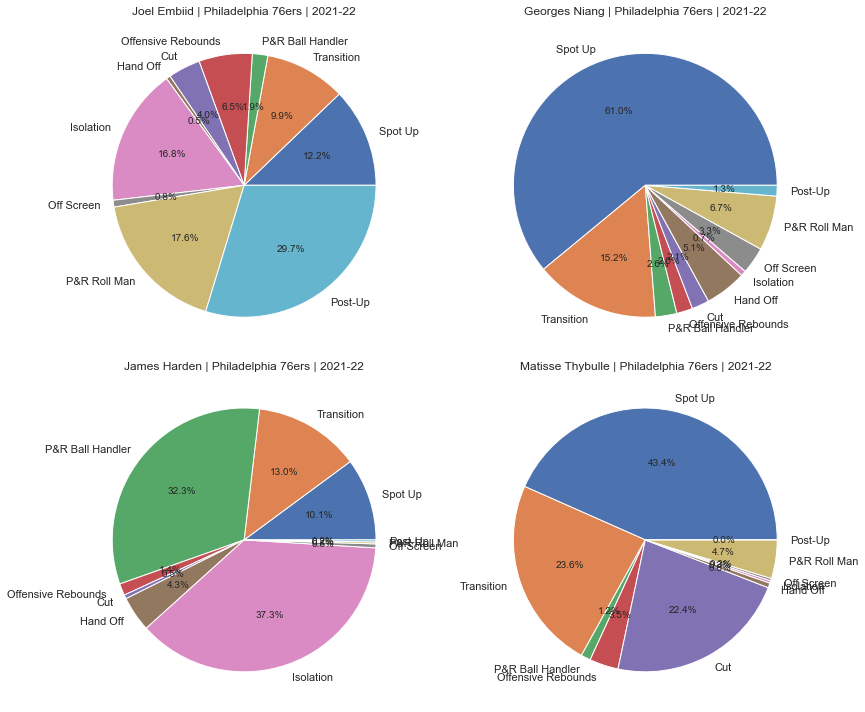

In [10]:
figsize(12, 10)

for i in range(4):
    plt.subplot(2, 2, i+1)
    pdf = df.loc[lookup_idx[i]].copy()
    plt.title(f"{pdf['Player']} | {pdf['Team']} | 2021-22")
    plt.pie([pdf[col] for col in cols], 
            labels=[col.replace('_Poss%', '').replace('(put backs)', '')
                    for col in cols],
            autopct='%.1f%%')

plt.tight_layout()